In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter07/breastcancer.csv')

In [ ]:
df.head()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

No missing values

### Data Preparation

Labeling target

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()
df['diagnosis'] = enc.fit_transform(df['diagnosis'])

In [ ]:
df.head() # M:1, B:0

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


drop unused columns

In [ ]:
df = df.drop(['id'], axis=1)

Train / Test split

In [ ]:
X = df.drop(['diagnosis'], axis=1).values
y = df.diagnosis.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Scale data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model train

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_tree, plot_importance

In [ ]:
dt = DecisionTreeClassifier()
svc = SVC(probability=True)
ada_dt = AdaBoostClassifier(base_estimator=dt)
ada_svc = AdaBoostClassifier(base_estimator=svc, n_estimators=10, random_state=0, learning_rate=0.3)
gbm = GradientBoostingClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=20, oob_score=True, n_jobs=-1)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
ada_dt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [ ]:
ada_svc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='rbf', max_iter=-1,
                                      probability=True, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=0.3, n_estimators=10, random_state=0)

In [ ]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

### Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectFromModel

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_ada_dt = ada_dt.predict(X_test)
y_pred_ada_svc = ada_svc.predict(X_test)
y_pred_gbm = gbm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [ ]:
def plot_confusion_matrix(y_test, y_pred, title):
    plt.figure(figsize=(16, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.5)
    plt.title(title)
    plt.show()

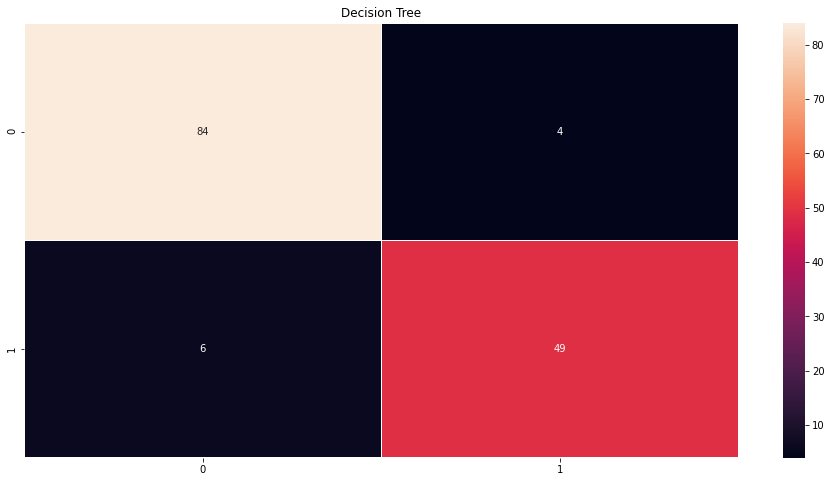

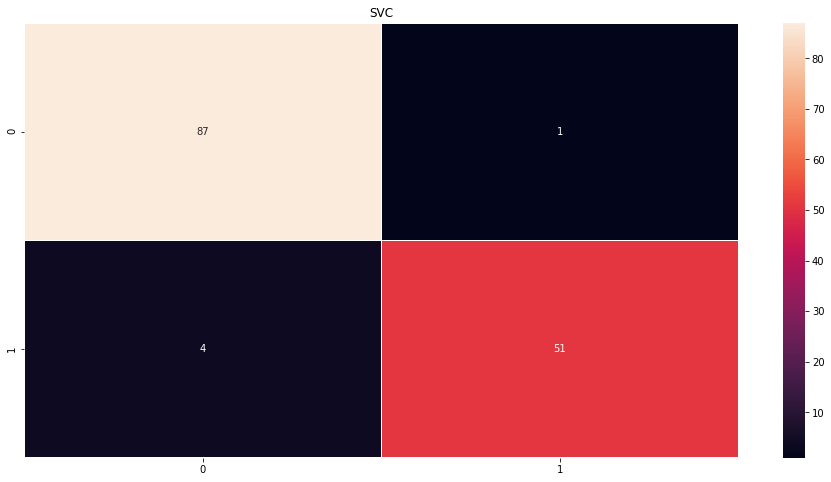

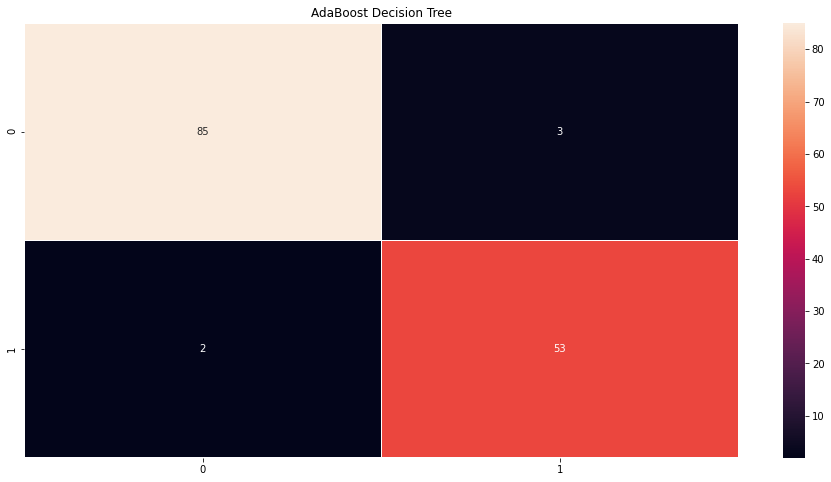

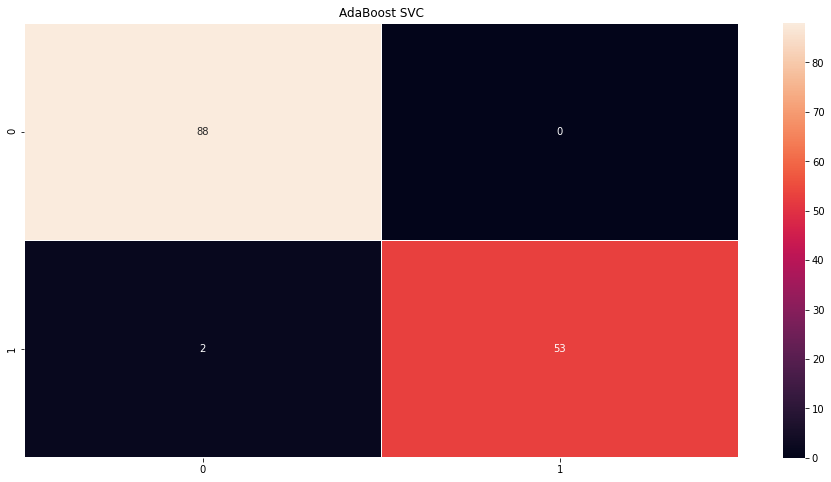

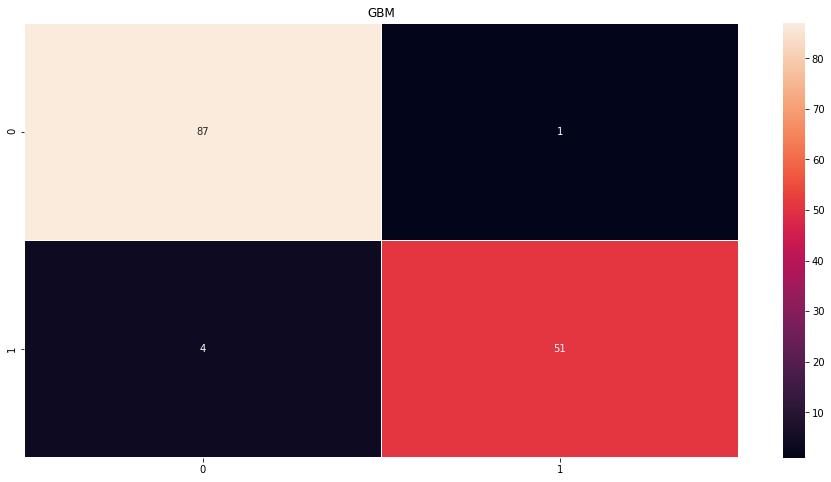

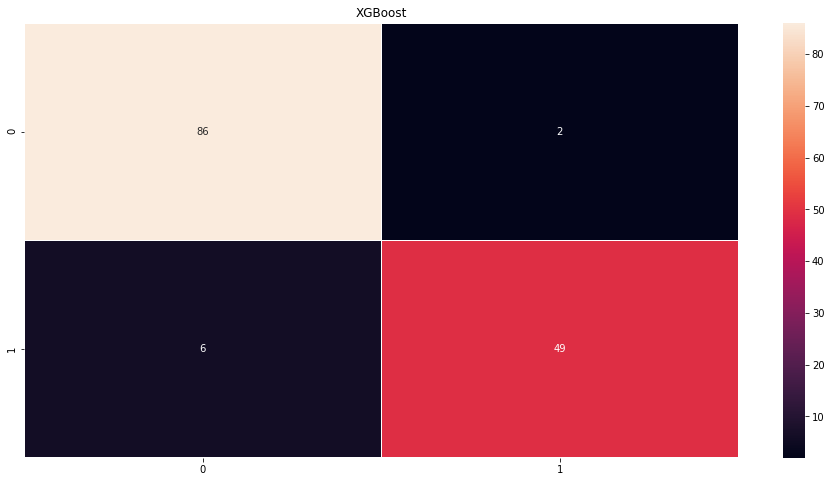

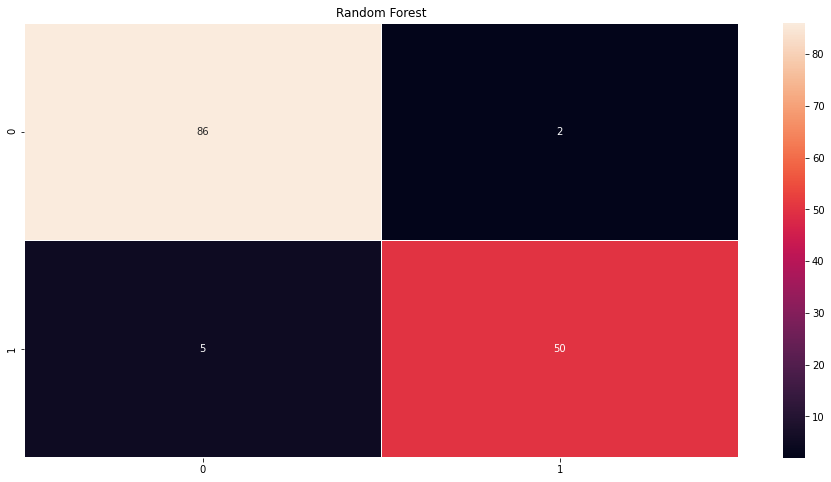

In [ ]:
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')
plot_confusion_matrix(y_test, y_pred_svc, 'SVC')
plot_confusion_matrix(y_test, y_pred_ada_dt, 'AdaBoost Decision Tree')
plot_confusion_matrix(y_test, y_pred_ada_svc, 'AdaBoost SVC')
plot_confusion_matrix(y_test, y_pred_gbm, 'GBM')
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

In [ ]:
def print_classification_report(y_test, y_pred, title):
    print(title)
    print(classification_report(y_test, y_pred))
    print(100*'-')

In [ ]:
print_classification_report(y_test, y_pred_dt, 'Decision Tree')
print_classification_report(y_test, y_pred_svc, 'SVC')
print_classification_report(y_test, y_pred_ada_dt, 'AdaBoost Decision Tree')
print_classification_report(y_test, y_pred_ada_svc, 'AdaBoost SVC')
print_classification_report(y_test, y_pred_gbm, 'GBM')
print_classification_report(y_test, y_pred_xgb, 'XGBoost')
print_classification_report(y_test, y_pred_rf, 'Random Forest')

Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        88
           1       0.92      0.89      0.91        55

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143

----------------------------------------------------------------------------------------------------
SVC
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        88
           1       0.98      0.93      0.95        55

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

----------------------------------------------------------------------------------------------------
AdaBoost Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     

In [ ]:
acc = [dt.score(X_test, y_test),
       svc.score(X_test, y_test),
       ada_dt.score(X_test, y_test),
       ada_svc.score(X_test, y_test),
       gbm.score(X_test, y_test),
       xgb.score(X_test, y_test),
       rf.score(X_test, y_test)
]
label = ['DT', 'SVC', 'AdaDT', 'AdaSVC', 'GBM', 'XGB', 'RF']
idx = np.arange(len(label))

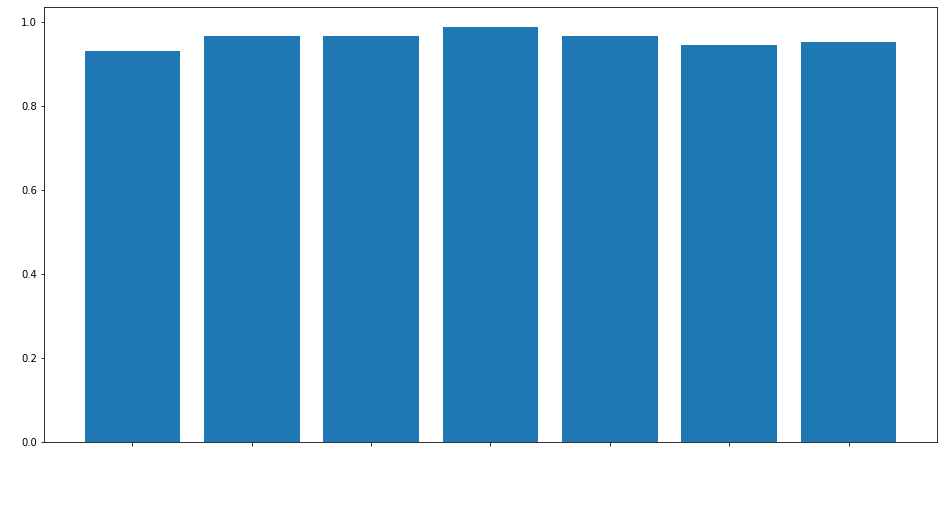

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(idx, acc)
plt.xticks(idx, label, rotation=90, c='w')
plt.xlabel('Model', c='w')
plt.ylabel('Accuracy', c='w')
plt.show()

### Feature Importance

Example of feature importances visualization

In [ ]:
print(xgb.feature_importances_)

[0.         0.01482263 0.         0.         0.00368022 0.00716115
 0.00234307 0.01851222 0.00208184 0.00106746 0.00331239 0.00641401
 0.00531472 0.00708932 0.00237189 0.00232642 0.00266265 0.00198059
 0.00223462 0.         0.19779369 0.02476008 0.58435357 0.02899262
 0.00562132 0.00776475 0.02394252 0.03759747 0.0036057  0.00219308]


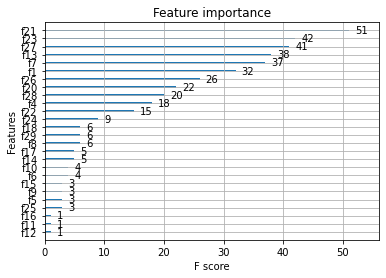

In [ ]:
plot_importance(xgb)

Feature Selection

In [ ]:
def feature_importances_performance(model, new_model, model_name, X_train, X_test, y_train, y_test):
    print(model_name)
    feature_imp = sorted(model.feature_importances_)

    for threshold in feature_imp:
        selection = SelectFromModel(model, threshold=threshold, prefit=True)

        selected_feature_X_train = selection.transform(X_train)
        new_model.fit(selected_feature_X_train, y_train)

        selected_feature_X_test = selection.transform(X_test)
        y_pred = new_model.predict(selected_feature_X_test)

        acc = accuracy_score(y_test, y_pred)

        print(f'Threshold={threshold:.5f}, Number of features={selected_feature_X_train.shape[1]}, Model Accuracy: {acc:.3f}')
    print(100*'-')

In [ ]:
feature_importances_performance(dt, DecisionTreeClassifier(), 'Decision Tree', X_train, X_test, y_train, y_test)
# feature_importances_performance(svc, SVC(probability=True), 'SVC', X_train, X_test, y_train, y_test)
feature_importances_performance(ada_dt, AdaBoostClassifier(base_estimator=dt), 'AdaBoost Decision Tree', X_train, X_test, y_train, y_test)
# feature_importances_performance(ada_svc, AdaBoostClassifier(base_estimator=svc, n_estimators=10, random_state=0, learning_rate=0.3), 'AdaBoost SVC', X_train, X_test, y_train, y_test)
feature_importances_performance(gbm, GradientBoostingClassifier(), 'GradientBoosting', X_train, X_test, y_train, y_test)
feature_importances_performance(xgb, XGBClassifier(), 'XGBoost', X_train, X_test, y_train, y_test)
feature_importances_performance(rf, RandomForestClassifier(), 'Random Forest', X_train, X_test, y_train, y_test)

Decision Tree
Threshold=0.00000, Number of features=30, Model Accuracy: 0.958
Threshold=0.00000, Number of features=30, Model Accuracy: 0.951
Threshold=0.00000, Number of features=30, Model Accuracy: 0.951
Threshold=0.00000, Number of features=30, Model Accuracy: 0.930
Threshold=0.00000, Number of features=30, Model Accuracy: 0.944
Threshold=0.00000, Number of features=30, Model Accuracy: 0.923
Threshold=0.00000, Number of features=30, Model Accuracy: 0.937
Threshold=0.00000, Number of features=30, Model Accuracy: 0.944
Threshold=0.00000, Number of features=30, Model Accuracy: 0.958
Threshold=0.00000, Number of features=30, Model Accuracy: 0.958
Threshold=0.00000, Number of features=30, Model Accuracy: 0.937
Threshold=0.00000, Number of features=30, Model Accuracy: 0.951
Threshold=0.00000, Number of features=30, Model Accuracy: 0.951
Threshold=0.00000, Number of features=30, Model Accuracy: 0.937
Threshold=0.00000, Number of features=30, Model Accuracy: 0.930
Threshold=0.00000, Number 

Cross Validation Performances

In [ ]:
kfold = KFold(n_splits=40)
cv_dt = DecisionTreeClassifier()
cv_svc = SVC(probability=True)
cv_ada_dt = AdaBoostClassifier(base_estimator=dt)
cv_ada_svc = AdaBoostClassifier(base_estimator=svc, n_estimators=10, random_state=0, learning_rate=0.3)
cv_gbm = GradientBoostingClassifier()
cv_xgb = XGBClassifier()
cv_rf = RandomForestClassifier()

cv_r_dt = cross_val_score(cv_dt, X_train, y_train, cv=kfold, verbose=True)
cv_r_svc = cross_val_score(cv_svc, X_train, y_train, cv=kfold, verbose=True)
cv_r_ada_dt = cross_val_score(cv_ada_dt, X_train, y_train, cv=kfold, verbose=True)
cv_r_ada_svc = cross_val_score(cv_ada_svc, X_train, y_train, cv=kfold, verbose=True)
cv_r_gbm = cross_val_score(cv_gbm, X_train, y_train, cv=kfold, verbose=True)
cv_r_xgb = cross_val_score(cv_xgb, X_train, y_train, cv=kfold, verbose=True)
cv_r_rf = cross_val_score(cv_rf, X_train, y_train, cv=kfold, verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [ ]:
print("DT Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_dt.mean()*100, cv_r_dt.std()*100))
print("SVC Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_svc.mean()*100, cv_r_svc.std()*100))
print("AdaBoost DT Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_ada_dt.mean()*100, cv_r_ada_dt.std()*100))
print("AdaBoost SVC Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_ada_svc.mean()*100, cv_r_ada_svc.std()*100))
print("GBM Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_gbm.mean()*100, cv_r_gbm.std()*100))
print("XGB Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_xgb.mean()*100, cv_r_xgb.std()*100))
print("Random Forest Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (cv_r_rf.mean()*100, cv_r_rf.std()*100))

DT Mean Accuracy: 94.48%  Standard Deviation 7.86%
SVC Mean Accuracy: 98.11%  Standard Deviation 4.29%
AdaBoost DT Mean Accuracy: 94.66%  Standard Deviation 7.96%
AdaBoost SVC Mean Accuracy: 97.41%  Standard Deviation 4.68%
GBM Mean Accuracy: 95.55%  Standard Deviation 6.60%
XGB Mean Accuracy: 96.25%  Standard Deviation 5.50%
Random Forest Mean Accuracy: 95.82%  Standard Deviation 6.16%


In [ ]:
sfold = StratifiedKFold(n_splits=40)
cv_dt = DecisionTreeClassifier()
cv_svc = SVC(probability=True)
cv_ada_dt = AdaBoostClassifier(base_estimator=dt)
cv_ada_svc = AdaBoostClassifier(base_estimator=svc, n_estimators=10, random_state=0, learning_rate=0.3)
cv_gbm = GradientBoostingClassifier()
cv_xgb = XGBClassifier()
cv_rf = RandomForestClassifier()

scv_r_dt = cross_val_score(cv_dt, X_train, y_train, cv=sfold, verbose=True)
scv_r_svc = cross_val_score(cv_svc, X_train, y_train, cv=sfold, verbose=True)
scv_r_ada_dt = cross_val_score(cv_ada_dt, X_train, y_train, cv=sfold, verbose=True)
scv_r_ada_svc = cross_val_score(cv_ada_svc, X_train, y_train, cv=sfold, verbose=True)
scv_r_gbm = cross_val_score(cv_gbm, X_train, y_train, cv=sfold, verbose=True)
scv_r_xgb = cross_val_score(cv_xgb, X_train, y_train, cv=sfold, verbose=True)
scv_r_rf = cross_val_score(cv_rf, X_train, y_train, cv=sfold, verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [ ]:
print("DT Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_dt.mean()*100, scv_r_dt.std()*100))
print("SVC Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_svc.mean()*100, scv_r_svc.std()*100))
print("AdaBoost DT Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_ada_dt.mean()*100, scv_r_ada_dt.std()*100))
print("AdaBoost SVC Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_ada_svc.mean()*100, scv_r_ada_svc.std()*100))
print("GBM Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_gbm.mean()*100, scv_r_gbm.std()*100))
print("XGB Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_xgb.mean()*100, scv_r_xgb.std()*100))
print("Random Forest Mean Accuracy: %.2f%%  Standard Deviation %.2f%%" % (scv_r_rf.mean()*100, scv_r_rf.std()*100))

DT Mean Accuracy: 94.91%  Standard Deviation 7.09%
SVC Mean Accuracy: 98.11%  Standard Deviation 4.29%
AdaBoost DT Mean Accuracy: 95.34%  Standard Deviation 6.52%
AdaBoost SVC Mean Accuracy: 97.66%  Standard Deviation 4.97%
GBM Mean Accuracy: 96.25%  Standard Deviation 5.42%
XGB Mean Accuracy: 96.25%  Standard Deviation 4.60%
Random Forest Mean Accuracy: 95.80%  Standard Deviation 5.08%
